In [1]:
import sys
print(sys.path.append(sys.version))
import pip
import os
print(os.getcwd())
print(os.listdir(os.getcwd()))

None
/Users/yunie/Documents/USC/2019_Fall/INF_552_machine_learning/INF552_hw2
['Untitled1.ipynb', '.DS_Store', 'Untitled.ipynb', 'inf552_hw2.pdf', 'regression_plot_outliers_removed.png', '.ipynb_checkpoints', 'Folds5x2_pp.xlsx', 'regression_plot.png', 'coefficients.png']


# Regression

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [201]:
data = pd.read_excel('Folds5x2_pp.xlsx', sheet_name = "Sheet1")
num_rows = len(data)
num_cols = len(data.columns)
colnames = data.columns

print("Number of rows: ", num_rows)
print("Number of columns: ", num_cols)
print("Column Names: ", colnames)

Number of rows:  9568
Number of columns:  5
Column Names:  Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')


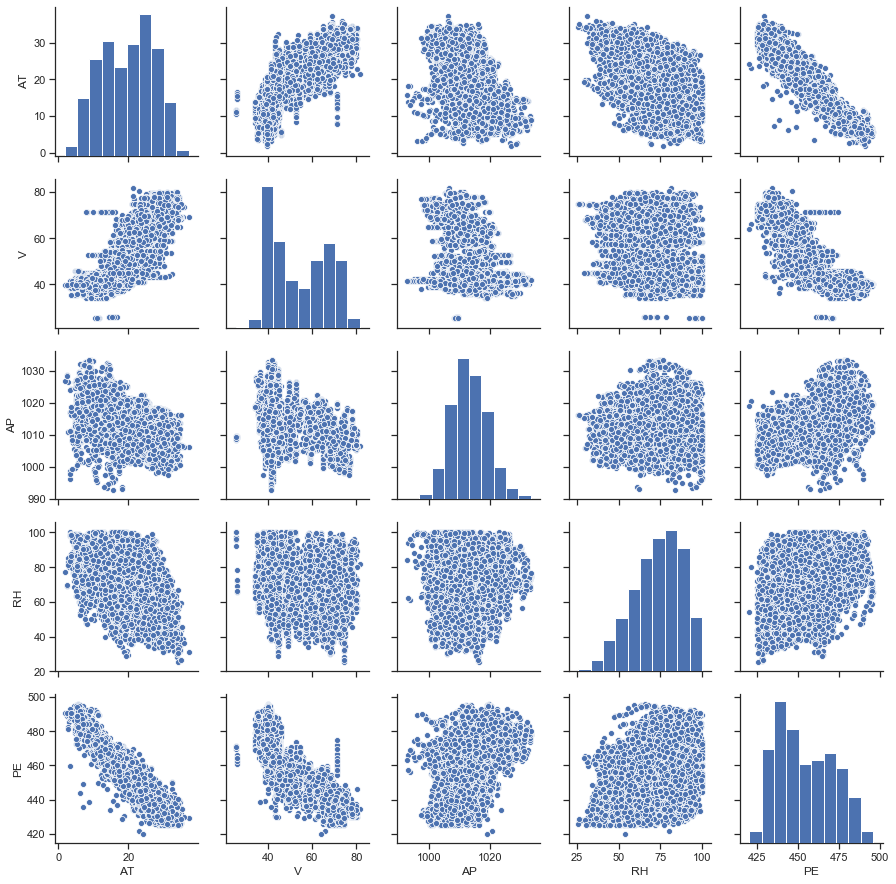

In [285]:
sns.set(style = "ticks", color_codes = True)
scatterplot = sns.pairplot(data)
plt.savefig("scatterplot.png")

In [283]:
data_description = pd.DataFrame(columns = (['column name', 'mean', 'median', 
                                            'range', 'first quartile', 'thrid quartile', 'interquartile range']))
for i in range(0, len(data.columns)):
        mean = data[data.columns[i]].describe()['mean']
        median = data[data.columns[i]].describe()['50%']
        rg = data[data.columns[i]].describe()['max'] - data[data.columns[i]].describe()['min']
        q1 = data[data.columns[i]].describe()['25%']
        q3 = data[data.columns[i]].describe()['75%']
        interquartile = q3 - q1
        data_description = data_description.append ({'column name' : data.columns[i],
                                 'mean' : mean,
                                 'median' : median,
                                  'range' : rg,
                                  'first quartile' : q1,
                                  'thrid quartile' : q3,
                                  'interquartile range' : interquartile
                                 }, ignore_index = True)
data_description

,column name,mean,median,range,first quartile,thrid quartile,interquartile range
0,AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
1,V,54.305804,52.080,56.20,41.7400,66.54,24.8000
2,AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
3,RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
4,PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


In [284]:
response = 'PE'
predictors = data.columns[:-1]


[<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                     PE   R-squared:                       0.899
 Model:                            OLS   Adj. R-squared:                  0.899
 Method:                 Least Squares   F-statistic:                 8.510e+04
 Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
 Time:                        23:45:50   Log-Likelihood:                -29756.
 No. Observations:                9568   AIC:                         5.952e+04
 Df Residuals:                    9566   BIC:                         5.953e+04
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

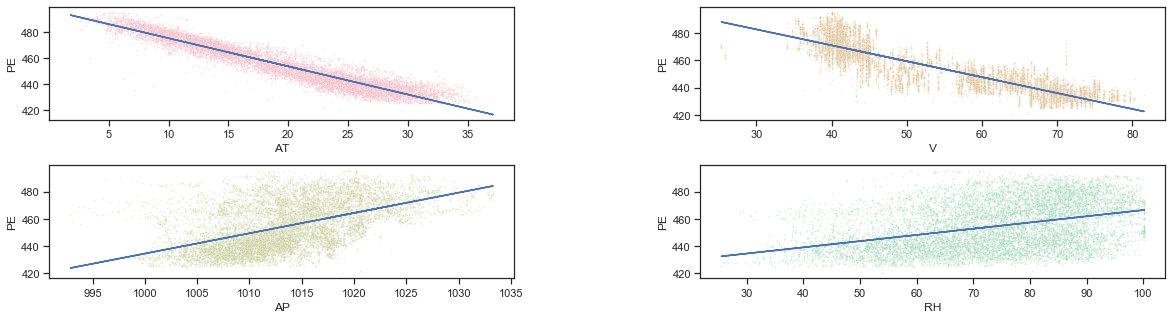

In [302]:
import statsmodels.formula.api as smf

fig_reg = plt.figure(figsize = (20, 5))
fig_reg.subplots_adjust(hspace = .4, wspace = .4)
palette = sns.color_palette("husl", 8)

univariate_reg_summary = []
univariate_coef = pd.DataFrame(index = predictors, columns = ['univariate coefficients'])

for i in range(0, len(predictors)):
    predictor = predictors[i]
    formula = response + '~' + predictor
    reg_model = smf.ols(formula, data).fit()
    reg_result = reg_model.predict(data[predictor])
    univariate_reg_summary.append(reg_model.summary())
    univariate_coef.loc[predictor] = reg_model.params[1]
    
    fig_reg.add_subplot(2, 2, (i + 1))
    sns.scatterplot(data[predictor], data[response], s = 3, alpha = .2, color = palette[i])
    plt.plot(data[predictor], reg_result)
    
plt.savefig("regression_plot.png")
univariate_reg_summary

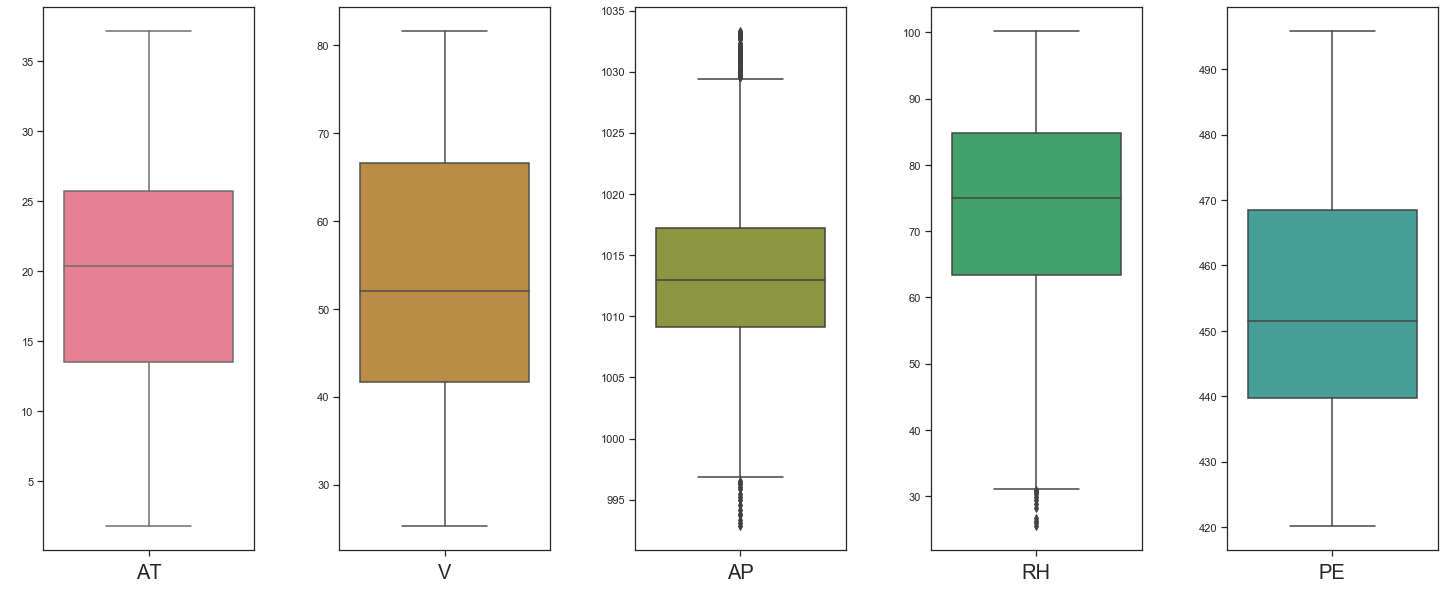

In [303]:
box_fig = plt.figure(figsize = (25, 10))
box_fig.subplots_adjust(hspace = .4, wspace = .4)
palette = sns.color_palette("husl", 8)

for i in range(0, len(data.columns)):
    box_fig.add_subplot(1, len(data.columns), (i + 1))
    boxplot = sns.boxplot(data[data.columns[i]], orient = 'v', color = palette[i])
    boxplot.axes.set_xlabel(data.columns[i], fontsize = '20')
    boxplot.axes.set_ylabel(' ')
plt.savefig("boxplot.png")

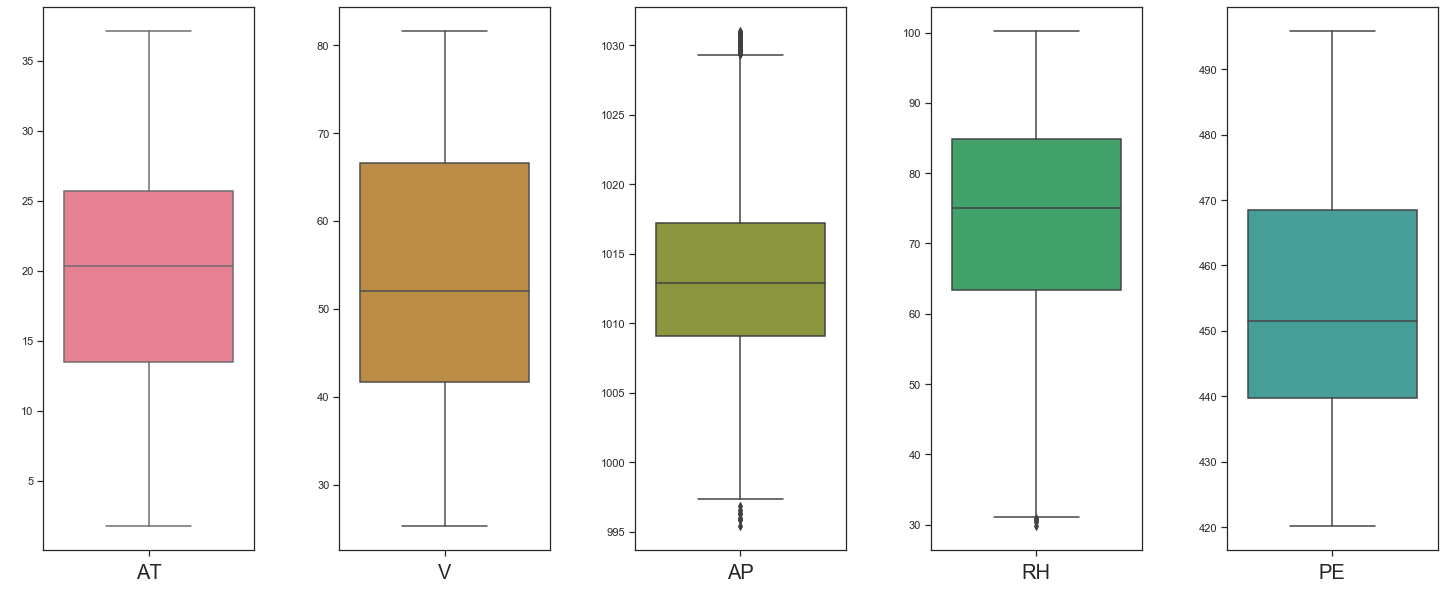

In [287]:
from scipy import stats

z = np.abs(stats.zscore(data.AP))
y = np.abs(stats.zscore(data.RH))

threshold = 3


outliers_removed = data.copy()
outliers_removed.AP = outliers_removed.AP[(z < threshold)]
outliers_removed.RH = outliers_removed.RH[(y < threshold)]

box_fig_outliers_removed = plt.figure(figsize = (25, 10))
box_fig_outliers_removed.subplots_adjust(hspace = .4, wspace = .4)
palette = sns.color_palette("husl", 8)

for i in range(0, len(outliers_removed.columns)):
    box_fig_outliers_removed.add_subplot(1, len(outliers_removed.columns), (i + 1))
    boxplot_outliers_removed = sns.boxplot(outliers_removed[outliers_removed.columns[i]], orient = 'v', color = palette[i])
    boxplot_outliers_removed.axes.set_xlabel(outliers_removed.columns[i], fontsize = '20')
    boxplot_outliers_removed.axes.set_ylabel(' ')
    
plt.savefig("boxplot_outliers_removed.png")

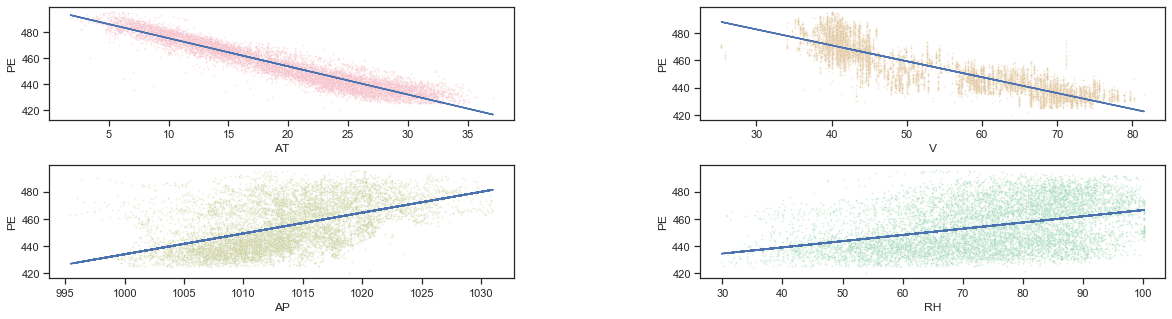

In [288]:
fig_outliers_removed = plt.figure(figsize = (20, 5))
fig_outliers_removed.subplots_adjust(hspace = .4, wspace = .4)
palette = sns.color_palette("husl", 8)

summary_outliers_removed = []


for i in range(0, len(predictors)):
    predictor = predictors[i]
    formula = response + '~' + predictor
    model_outliers_removed = smf.ols(formula, outliers_removed).fit()
    result_outliers_removed = model_outliers_removed.predict(outliers_removed[predictor])
    summary_outliers_removed.append(model_outliers_removed.summary())
    
    fig_outliers_removed.add_subplot(2, 2, (i + 1))
    sns.scatterplot(outliers_removed[predictor], outliers_removed[response], s = 3, alpha = .2, color = palette[i])
    plt.plot(outliers_removed[predictor], result_outliers_removed)
plt.savefig("regression_outliers_removed.png")

In [304]:
predictors_multivariate = ''
for i in range(0, len(predictors)):
    predictors_multivariate += predictors[i] + '+'
predictors_multivariate = predictors_multivariate[:-1]

formula_multivariate = response + '~' + predictors_multivariate
model_multivariate_reg = smf.ols(formula_multivariate, data).fit()
summary_multivariate_reg = [model_multivariate_reg.summary()]
multivariate_coef = model_multivariate_reg.params[1:]
summary_multivariate_reg

[<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                     PE   R-squared:                       0.929
 Model:                            OLS   Adj. R-squared:                  0.929
 Method:                 Least Squares   F-statistic:                 3.114e+04
 Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
 Time:                        23:55:27   Log-Likelihood:                -28088.
 No. Observations:                9568   AIC:                         5.619e+04
 Df Residuals:                    9563   BIC:                         5.622e+04
 Df Model:                           4                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

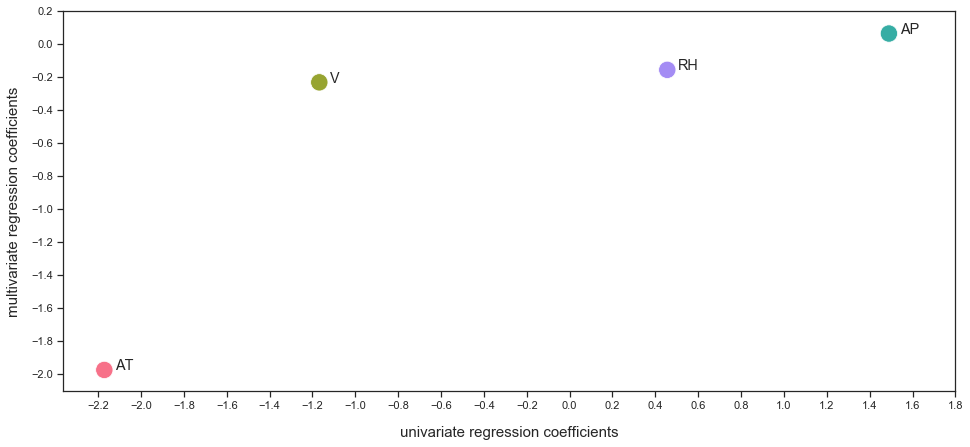

In [290]:
coef_df = univariate_coef.copy()
coef_df['multivariate coefficients'] = multivariate_coef


coef_fig = plt.figure(figsize = (16, 7))

coefficient_plot = sns.scatterplot('univariate coefficients', 'multivariate coefficients', data = coef_df, 
                                   hue = coef_df.index, s = 300, palette = 'husl', legend = False)
plt.xlabel("univariate regression coefficients", fontsize = 15, labelpad = 15)
plt.ylabel("multivariate regression coefficients", fontsize = 15, labelpad = 10)
plt.yticks(np.arange(-2.0, .3, .2))
plt.xticks(np.arange(-2.2, 2.0, .2))
for i in range(0, len(coef_df)) :
    coefficient_plot.text((coef_df['univariate coefficients'][i] + .05 ), coef_df['multivariate coefficients'][i], coef_df.index[i],
                         size = 'large')
plt.savefig('coefficients.png')

[<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:29:19   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1  

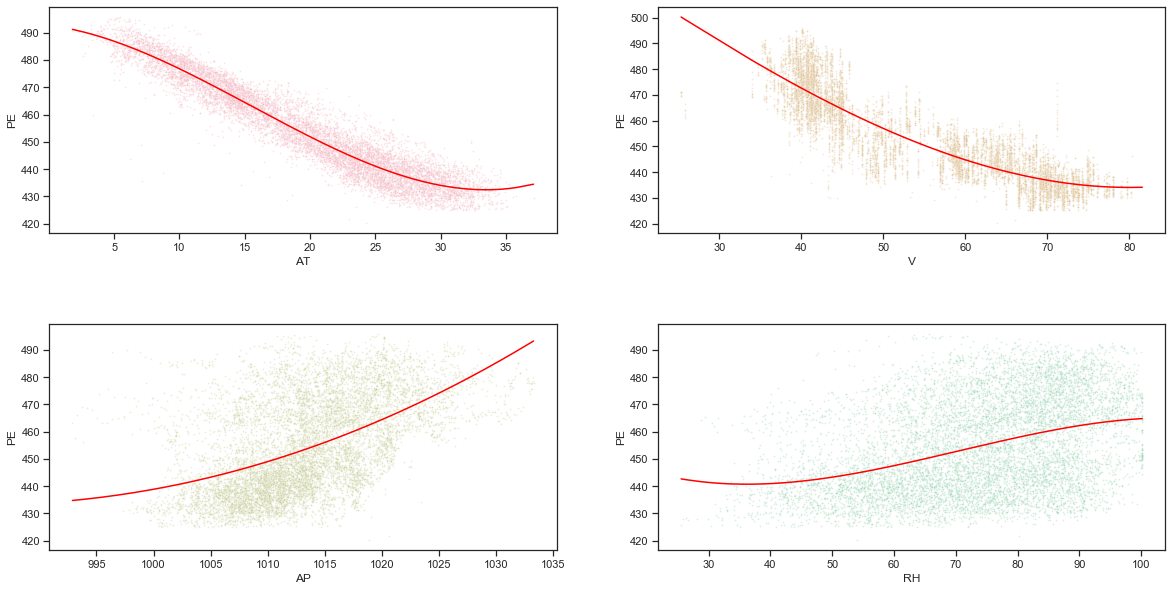

In [291]:
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

degree = 3
poly = PolynomialFeatures(degree)

data_poly = data.copy()
summary_poly = []
fig_poly = plt.figure(figsize = (20, 10))
fig_poly.subplots_adjust(hspace = .4, wspace = .2)

for i in range(0, len(predictors)) :
    data_poly = data_poly.sort_values(by = data_poly.columns[i])
    response_poly = data_poly[data_poly.columns[len(data_poly.columns) - 1]].values.reshape(-1,1)
    predictor = data_poly[data_poly.columns[i]].values.reshape(-1, 1)
    predictor_poly = poly.fit_transform(predictor)
    predictor_colnames = poly.get_feature_names(data_poly.columns[i])
    predictor_poly = pd.DataFrame(data = predictor_poly, columns = predictor_colnames)
    
    model_poly = sm.OLS(response_poly, predictor_poly).fit()
    
    results_poly = model_poly.predict(predictor_poly)
    fig_poly.add_subplot(2, 2, (i + 1))
    sns.scatterplot(data_poly[data_poly.columns[i]], data_poly[data_poly.columns[len(data_poly.columns) - 1]], s = 3, alpha = .2, color = palette[i])
    plt.plot(data_poly[data_poly.columns[i]], results_poly, color = 'red')
    
    
    summary_poly.append(model_poly.summary())
    
print(summary_poly)
plt.savefig("polynomial_regression.png")

In [292]:
predictors_interaction = ''
response = 'PE'
for i in range(0, (len(predictors) - 1)):
    for j in range((i + 1), len(predictors)) :
        predictors_interaction += (data.columns[i] + "*" + data.columns[(j)] + '+')
predictors_interaction = predictors_interaction[:-1]
predictors_interaction
formula_interaction = response + '~' + predictors_interaction

multiple_regressor_interaction = smf.ols(formula = formula_interaction, data = data)
multiple_regressor_interaction_result = multiple_regressor_interaction.fit()
print(multiple_regressor_interaction_result.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:29:32   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

In [293]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


x_train, x_test, y_train, y_test = train_test_split(data[predictors], data[response],
                                                   test_size = .3, random_state = 42)

regressor_plain = sm.OLS(y_train, x_train).fit()
y_predict = regressor_plain.predict(x_test)
error_plain = mean_squared_error(y_test, y_predict)

error_plain



25.096901176932285

In [294]:
poly_all = PolynomialFeatures(2)

predictors_all = poly_all.fit_transform(data[predictors])
predictors_all_colname = poly_all.get_feature_names(predictors)
predictors_all = pd.DataFrame(data = predictors_all, columns = predictors_all_colname)

x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(predictors_all, data[response],
                                                                   test_size = .3, random_state = 53)

regressor_all = sm.OLS(y_train_all, x_train_all).fit()
y_predict_all = regressor_all.predict(x_test_all)
error_all = mean_squared_error(y_test_all, y_predict_all)
print(error_all)
print(regressor_all.summary())

18.353409281019633
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7178.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:29:35   Log-Likelihood:                -19182.
No. Observations:                6697   AIC:                         3.839e+04
Df Residuals:                    6682   BIC:                         3.850e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1          -7087.9525   1439.254 

In [295]:
significant_variables = predictors_all.columns[regressor_all.pvalues < 0.005]
predictors_enhanced = predictors_all.loc[:,significant_variables]
predictors_enhanced['AT'] = predictors_all.loc[:,'AT']
predictors_enhanced['V'] = predictors_all.loc[:,'V']

x_train_enhanced, x_test_enhanced, y_train_enhanced, y_test_enhanced = train_test_split(predictors_enhanced, data[response],
                                                                   test_size = .3, random_state = 64)

regressor_enhanced = sm.OLS(y_train_enhanced, x_train_enhanced).fit()
y_predict_enhanced = regressor_enhanced.predict(x_test_enhanced)
error_enhanced = mean_squared_error(y_test_enhanced, y_predict_enhanced)
print(regressor_enhanced.summary())
error_enhanced

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.038e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:29:38   Log-Likelihood:                -19167.
No. Observations:                6697   AIC:                         3.836e+04
Df Residuals:                    6686   BIC:                         3.843e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1          -9601.5806   1088.774     -8.819      0.0

18.687618964382512

In [296]:
def make_error_dataframe():
    dataframe = pd.DataFrame(columns = ['k_value', 'train_error_rate', 'test_error_rate'])
    return dataframe

In [297]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing

def get_knn_error(predictors, response):
    
    error = make_error_dataframe()
    x_train, x_test, y_train, y_test = train_test_split(predictors, data[response],
                                                                   test_size = 3, random_state = 75)
    
    for k in range (1, 100):
        knn_regressor = KNeighborsRegressor(k)
        knn_regressor.fit(x_train, y_train)
        
        knn_train_predict = knn_regressor.predict(x_train)
        knn_train_error_rate = mean_squared_error(y_train, knn_train_predict)
    
        knn_test_predict = knn_regressor.predict(x_test)
        knn_test_error_rate = mean_squared_error(y_test, knn_test_predict)
    
        error = error.append({'k_value' : k, 
                          'train_error_rate' : float(knn_train_error_rate),
                          'test_error_rate' : float(knn_test_error_rate)},
                         ignore_index = True)
    return error

In [298]:
def get_optimal_k(error, which_error) :
    optimal_k_value = error['k_value'][(error[which_error].values.argmin())]
    return int(optimal_k_value)

optimal k for KNN regressor:  15


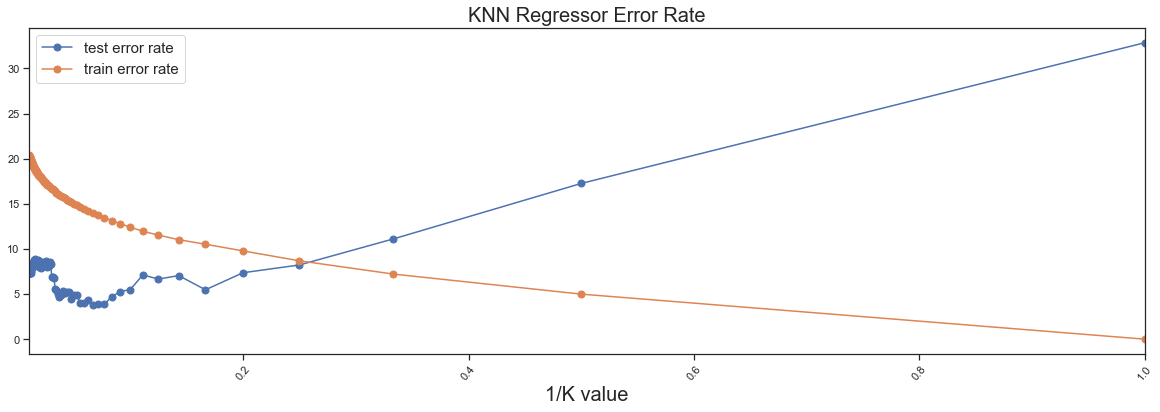

In [299]:
error_knn = get_knn_error(data[predictors], response)
error_knn['1/k'] = (1 / error_knn['k_value'])
optimal_k = get_optimal_k(error_knn, 'test_error_rate')
error_knn.plot(x = '1/k', y = ['test_error_rate', 'train_error_rate'], 
           marker = 'o', markersize = 7, figsize = (20,6))
ax = plt.gca()
plt.xticks(rotation = 50)
plt.title('KNN Regressor Error Rate', fontsize = 20)
ax.legend(('test error rate', 'train error rate'), fontsize = 15)
ax.set_xlabel('1/K value', fontsize = 20)
plt.savefig('knn_regressor_error_rate.png')
print("optimal k for KNN regressor: " , optimal_k)

optimal k for KNN regressor(scaled):  14


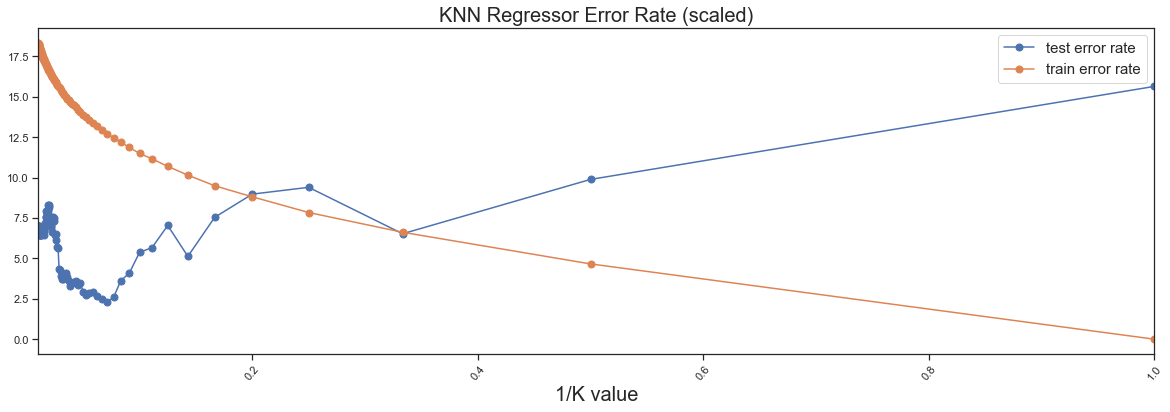

In [300]:
predictors_scaled = preprocessing.scale(data[predictors])
predictors_scaled = pd.DataFrame(data = predictors_scaled, columns = predictors)

error_knn_scaled = get_knn_error(predictors_scaled, response)
optimal_k_scaled = get_optimal_k(error_knn_scaled, 'test_error_rate')
error_knn_scaled['1/k'] = (1 / error_knn_scaled['k_value'])

error_knn_scaled.plot(x = '1/k', y = ['test_error_rate', 'train_error_rate'], 
           marker = 'o', markersize = 7, figsize = (20,6))
ax = plt.gca()
plt.xticks(rotation = 50)
plt.title('KNN Regressor Error Rate (scaled)', fontsize = 20)
ax.legend(('test error rate', 'train error rate'), fontsize = 15)
ax.set_xlabel('1/K value', fontsize = 20)
plt.savefig('knn_regressor_error_rate_scaled.png')
print("optimal k for KNN regressor(scaled): " , optimal_k_scaled)

In [301]:
def get_best_error(error, which_error):
    best_error = error[which_error].values.min()
    return best_error

get_best_error(error_knn_scaled, 'test_error_rate')

2.2994636054420585

# Answers and explanations

### (b) Exploring the data:
##### i. How many rows are in this data set? How many columns? What do the rows and columns represent?
    Number of rows:  9568
    Number of columns:  5
    Column Names:  Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')
    The columns represent the hourly average ambient variables Temperature(T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum(V), and the net hourly electrical energy output (EP) of the plant.
    The rows represent the combination of these features that have occurred simultaneously.

##### ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.
<img src = "scatterplot.png">
    
    Above is the boxplot of independent variables and dependent variable of the dataset. The scatterplot shows that the response variable(PE) is somewhat correlated to all of the predictors. It shows strong correlation between (PE, AT), and (PE, V). Therefore, variables PE and V might be contributing factors in determining response PE. Moreover, independent variables (AT,V) seems to be correlated. There is a possibility that the  interaction between AT and V might be significant.

##### iii. What are the mean, the median, range, first and third quartiles, and in- terquartile ranges of each of the variables in the dataset? Summarize them in a table.

           column name	  mean	    median	range	first quartile	thrid quartile	interquartile range
            	AT	   19.651231	20.345	35.30	   13.5100	         25.72	         12.2100
            	V	   54.305804	52.080	56.20	   41.7400	         66.54	         24.8000
            	AP	 1013.259078  1012.940	40.41	  1009.1000	       1017.26	          8.1600
            	RH	   73.308978	74.975	74.60	    63.3275	         84.83	         21.5025
            	PE	  454.365009  451.550	75.50	   439.7500	        468.43	         28.6800

### (c)For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

    code:
```python
        for i in range(0, len(predictors)):
            predictor = predictors[i]
            formula = response + '~' + predictor
            reg_model = smf.ols(formula, data).fit()
            reg_result = reg_model.predict(data[predictor])
```
<img src = "regression_plot.png">
        
        The p values for all predictors are close to 0. Therefore, all the predictors have statistically significant assotiation with the response. As we can see in the plot above, although the linear regression line does not accurately reflect all the predictors, they tend to have a linear relationship with the response.
        
<img src = "boxplot.png">

    Above is the boxplot of the dataset. As we can see, variables AP and RH has significant outliers. Therefore, I will remove outliers that exist out of 3 std.
    
    code:
```python
       from scipy import stats

       z = np.abs(stats.zscore(data.AP))
        y = np.abs(stats.zscore(data.RH))

        threshold = 3
        outliers_removed = data.copy()
        outliers_removed.AP = outliers_removed.AP[(z < threshold)]
        outliers_removed.RH = outliers_removed.RH[(y < threshold)]
        
```
<img src = "boxplot_outliers_removed.png">

    Above is the boxplot with the outliers removed
    
<img src = "regression_outliers_removed.png">

    And the above is the regression performed on data without outliers. It seems like removing outliers does not significantly improve the linear regression model for each variable.

### (d)Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?
    
    code:
``` python
        predictors_multivariate = ''
        for i in range(0, len(predictors)):
            predictors_multivariate += predictors[i] + '+'
            predictors_multivariate = predictors_multivariate[:-1]

            formula_multivariate = response + '~' + predictors_multivariate
            model_multivariate_reg = smf.ols(formula_multivariate, data).fit()
``` 

                     coef      std err       t        P>|t|      [0.025      0.975]
               ------------------------------------------------------------------------------
     Intercept    454.6093      9.749     46.634      0.000     435.500     473.718
     AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
     V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
     AP             0.0621      0.009      6.564      0.000       0.044       0.081
     RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
     
     For all the predictors, the P value is close to 0. Therefore, we can reject the hull hypothesis for every predictor.
     
### (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.
<img src = "coefficients.png">